(32593, 12)
(812931, 2)
(4129, 15)
(4129, 33)


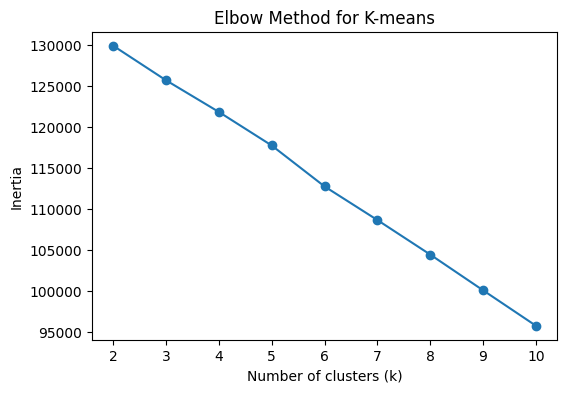

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
studentInfo = pd.read_csv("studentInfo.csv")
studentVle = pd.read_csv(
    "studentVle.csv",
    usecols=["id_student", "sum_click"],
    engine="python",
    on_bad_lines="skip"
)


print(studentInfo.shape)
print(studentVle.shape)
vle_agg = (
    studentVle
    .groupby("id_student")["sum_click"]
    .agg(["sum", "mean", "count"])
    .reset_index()
)

vle_agg.columns = ["id_student", "total_clicks", "avg_clicks", "num_activities"]
data = pd.merge(studentInfo, vle_agg, on="id_student", how="inner")
print(data.shape)
features = [
    "gender",
    "region",
    "highest_education",
    "imd_band",
    "age_band",
    "studied_credits",
    "total_clicks",
    "avg_clicks",
    "num_activities"
]

X = data[features]
X_encoded = pd.get_dummies(X, drop_first=True)
print(X_encoded.shape)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,11), inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-means")
plt.show()


In [3]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

data["cluster"] = clusters
data["cluster"].value_counts()
cluster_summary = (
    data
    .groupby("cluster")[["total_clicks", "avg_clicks", "num_activities", "studied_credits"]]
    .mean()
)

print(cluster_summary)
pd.crosstab(data["cluster"], data["final_result"], normalize="index")


         total_clicks  avg_clicks  num_activities  studied_credits
cluster                                                           
0         2957.710616    4.161476      736.924658        78.210616
1          861.647887    2.927835      245.260563        84.049296
2          319.677931    2.590223      115.461651        85.543638


final_result,Distinction,Fail,Pass,Withdrawn
cluster,,,,
0,0.152397,0.080479,0.647260,0.119863
1,0.084507,0.232394,0.485915,0.197183
2,0.081105,0.260946,0.456362,0.201587


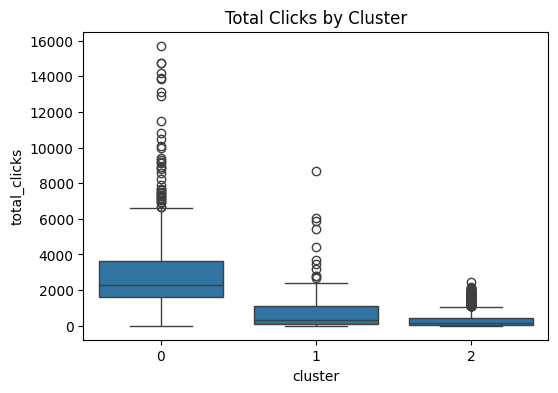

In [4]:
plt.figure(figsize=(6,4))
sns.boxplot(x="cluster", y="total_clicks", data=data)
plt.title("Total Clicks by Cluster")
plt.show()
